# create database and tables

In [1]:
!pip install psycopg2

In [2]:
# Install postgresql server
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'admin';"

# Setup a database with name `northwind` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS weekly_deaths;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE weekly_deaths;'

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../0-cron_3.0pl1-128.1ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-128.1ubuntu1) ...
Selecting previously unselected package logrotate.
Preparing to unpack .../1-logrotate_3.11.0-0.1ubuntu1_amd64.deb ...
Unpacking logrotate (3.11.0-0.1ubuntu1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../2-netbase_5.4_all.deb ...
Unpacking netbase (5.4) ...
Selecting previously unselected pac

In [3]:
import psycopg2

def connect():
  return psycopg2.connect(database='weekly_deaths', user='postgres', password='admin', host='localhost')

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


tables:
- age_group(age_group_id int is pk, age_group_name text)

- provinces(province_id int is pk, province_name text, province_pop int)

- sex_type(sex_type_id int is pk, sex_type_name text)

- year_week(year int, week_num int, start text, end text) tuple (year, week_num) is pk

- deaths(record_id int is pk, year int, week_num int, province_id int, sex_type_id int, age_group_id int, death_num int)


In [4]:
commands = (
  """
  create table if not exists age_group(
  age_group_id INT GENERATED ALWAYS AS IDENTITY,
  age_group_name VARCHAR(10) NOT NULL,
  PRIMARY KEY (age_group_id)
  )
  """,
  """
  create table if not exists sex_type(
  sex_type_id INT GENERATED ALWAYS AS IDENTITY,
  sex_type_name VARCHAR(25) NOT NULL,
  PRIMARY KEY (sex_type_id)
  )
  """,
  """
  create table if not exists provinces(
  province_id INT GENERATED ALWAYS AS IDENTITY,
  province_name VARCHAR(255) NOT NULL,
  province_pop INT NOT NULL,
  PRIMARY KEY (province_id)
  )
  """ ,
  """
  create table if not exists year_week(
  year INT NOT NULL,
  week_num INT NOT NULL,
  start_time VARCHAR(10) NOT NULL,
  end_time VARCHAR(10) NOT NULL,
  PRIMARY KEY (year, week_num)
  ) 
  """,
  """ 
  create table if not exists deaths (
  record_id INT GENERATED ALWAYS AS IDENTITY,
  year INT,
  week_num INT,
  province_id INT,
  sex_type_id INT,
  age_group_id INT,
  death_num INT,
  PRIMARY KEY (record_id),
  CONSTRAINT fk_year_week
    FOREIGN KEY (year, week_num)
    REFERENCES year_week (year, week_num)
  ,
  CONSTRAINT fk_provinces
    FOREIGN KEY (province_id)
    REFERENCES provinces (province_id)

  ,
  CONSTRAINT fk_sex_type
    FOREIGN KEY (sex_type_id)
    REFERENCES sex_type (sex_type_id)

  ,
  CONSTRAINT fk_age_group
    FOREIGN KEY (age_group_id)
    REFERENCES age_group (age_group_id)

  ) """)

In [5]:
def craete_tables(commands):
  con = None
  try:
    con = connect()
    cur = con.cursor()

    for command in commands:
      cur.execute(command)
    cur.close()
    con.commit()
  except (Exception, psycopg2.DatabaseError) as err:
    print(err)
  finally:
    if con is not None:
      con.close()

In [6]:
craete_tables(commands)

# fill tables

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pop = pd.read_csv('Iran_population.csv')
pop.head()

,استان‌ها,نفر
0,آذربایجان شرقی,4018000
1,آذربایجان غربی,3398000
2,اردبیل,1297000
3,اصفهان,5292000
4,البرز,2865000


In [10]:
d95 = pd.read_excel('weekly-death-by-province-age-group-and-sex-1395.xlsx', header=1, skiprows = range(1,2)).drop(['Unnamed: 7'], axis=1)

In [11]:
d95.head()

,سال,شماره هفته,کد استان,استان,جنسیت,سن,تعداد مرگ (ثبت شده)
0,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,0,5
1,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,1-4,4
2,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,5-9,2
3,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,10-14,1
4,1395,D95W44[951025-951101],P0001,آذربايجان شرقي,زن,15-19,4


In [12]:
d96 = pd.read_excel('weekly-death-by-province-age-group-and-sex-1396.xlsx', header=1, skiprows = range(1,2)).drop(['Unnamed: 7'], axis=1)
d97 = pd.read_excel('weekly-death-by-province-age-group-and-sex-1397.xlsx', header=1, skiprows = range(1,2)).drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
d98 = pd.read_excel('weekly-death-by-province-age-group-and-sex-1398.xlsx', header=1, skiprows = range(1,2)).drop(['Unnamed: 7'], axis=1)
d99 = pd.read_excel('weekly-death-by-province-age-group-and-sex-1399.xlsx', header=1, skiprows = range(1,2)).drop(['Unnamed: 7'], axis=1)

In [13]:
dfs = [d95, d96, d97, d98, d99]

In [14]:
def fill_provinces(pop):
  for i in range(len(pop)):
    df = pop.iloc[i]
    with connect() as con:
      with con.cursor() as cur:
        cur.execute('insert into provinces(province_name, province_pop) values (%s, %s)', (df['استان‌ها'], int(df['نفر'])))

In [15]:
fill_provinces(pop)

In [16]:
def fill_sex_type():
  with connect() as con:
      with con.cursor() as cur:
        cur.execute('insert into sex_type(sex_type_name) values (%s)', ('زن',))
        cur.execute('insert into sex_type(sex_type_name) values (%s)', ('مرد',))

In [17]:
fill_sex_type()

In [18]:
def fill_age_group():
  groups = ['0', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
    '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '+95']
  for i in groups:
    with connect() as con:
      with con.cursor() as cur:
        cur.execute('insert into age_group(age_group_name) values (%s)', (i,))

In [19]:
fill_age_group()

In [20]:
def fill_year_week(dfs):
  c = 0
  for d in dfs:
    print(c)
    c+=1
    last_year = -1
    last_week = -1
    for i in range(len(d)):
      start, end = (d.iloc[i][1].split('[')[1].split(']')[0].split('-'))
      year, week_num = (int('13'+d.iloc[i][1].split('D')[1][:2]), int(d.iloc[i][1].split('W')[1][:2]))
      if not((last_year == year) and (last_week == week_num)):
        last_year = year
        last_week = week_num
        with connect() as con:
          with con.cursor() as cur:
            cur.execute('insert into year_week(year, week_num, start_time, end_time) values (%s, %s, %s, %s)', (year,week_num,start,end,))


In [21]:
fill_year_week(dfs)

0
1
2
3
4


In [22]:
def fill_deaths(dfs):
  c = 0

  groups = ['0', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
    '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
    '80-84', '85-89', '90-94', '+95']

  age_group = dict(zip(groups, range(1, len(groups)+1)))
  sex_type = {'زن':1,
             'مرد':2}

  print(age_group)
  for d in dfs:
    print(c)
    c+=1
    for i in range(len(d)):
      year, week_num = (int('13'+d.iloc[i][1].split('D')[1][:2]), int(d.iloc[i][1].split('W')[1][:2]))
      age = age_group[str(d.iloc[i][5])]
      sex = sex_type[d.iloc[i][4]]
      province = int(d.iloc[i][2].replace('P00', ''))
      with connect() as con:
        with con.cursor() as cur:
          cur.execute('insert into deaths(year, week_num, province_id, sex_type_id, age_group_id, death_num) values (%s, %s, %s, %s, %s, %s)',
                      (year,week_num,province,sex,age,int(d.iloc[i][6]), ))


In [23]:
fill_deaths(dfs)

{'0': 1, '1-4': 2, '5-9': 3, '10-14': 4, '15-19': 5, '20-24': 6, '25-29': 7, '30-34': 8, '35-39': 9, '40-44': 10, '45-49': 11, '50-54': 12, '55-59': 13, '60-64': 14, '65-69': 15, '70-74': 16, '75-79': 17, '80-84': 18, '85-89': 19, '90-94': 20, '+95': 21}
0
1
2
3
4


# deaths in different years

{1395: 359549, 1396: 372690, 1397: 371892, 1398: 391378, 1399: 507511}

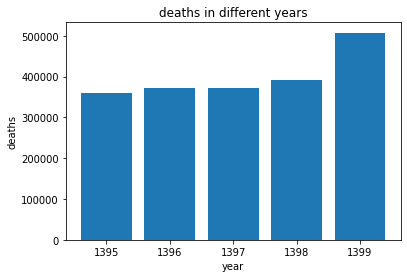

In [24]:
import matplotlib.pyplot as plt

deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('select year, sum(death_num) from deaths group by year')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0]] = i[1]

plt.bar(deats_stat.keys(), deats_stat.values())
plt.title('deaths in different years')
plt.xlabel('year')
plt.ylabel('deaths')

deats_stat

# men and women deaths in diffrent years

{(1395, 'زن'): 157153,
 (1395, 'مرد'): 202396,
 (1396, 'زن'): 164118,
 (1396, 'مرد'): 208572,
 (1397, 'زن'): 163337,
 (1397, 'مرد'): 208555,
 (1398, 'زن'): 169603,
 (1398, 'مرد'): 221775,
 (1399, 'زن'): 221104,
 (1399, 'مرد'): 286407}

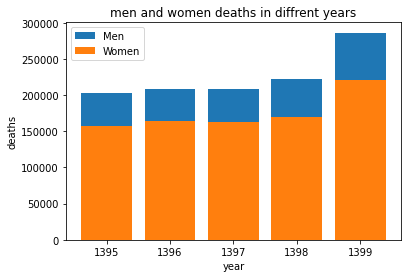

In [25]:
deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('''select year, sex_type_name, sum(death_num)
      from deaths inner join sex_type on sex_type.sex_type_id=deaths.sex_type_id
      group by year, sex_type_name''')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0], i[1]] = i[2]

labels = []
men_stat = []
women_stat = []
for i in deats_stat.keys():
  if i[1] == 'زن':
    women_stat.append(deats_stat[i])
  else:
    men_stat.append(deats_stat[i])
  labels.append(i[0])

labels = list(set(labels))
plt.bar(labels, men_stat, label='Men')
plt.bar(labels, women_stat, label='Women')
plt.title('men and women deaths in diffrent years')
plt.xlabel('year')
plt.ylabel('deaths')
plt.legend()
deats_stat

# ten provinces with most death in 1399 at zero age

In [26]:
!pip install arabic-reshaper
!pip install python-bidi

{'آذربایجان شرقی': 462,
 'آذربایجان غربی': 317,
 'اصفهان': 396,
 'تهران': 782,
 'خراسان رضوی': 985,
 'خوزستان': 790,
 'سیستان وبلوچستان': 785,
 'فارس': 351,
 'كرمان': 411,
 'همدان': 382}

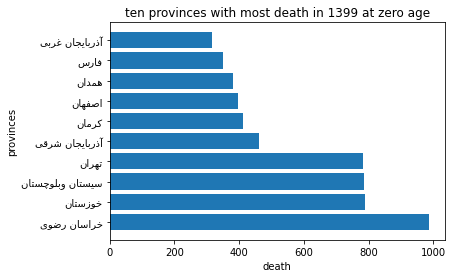

In [27]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('''
      select province_name, sum(death_num) as death_sum
      from deaths
      inner join provinces on provinces.province_id = deaths.province_id
      inner join age_group on age_group.age_group_id = deaths.age_group_id
      where year = 1399 and age_group_name = '0'
      group by provinces.province_id
      order by death_sum DESC
      limit 10
    ''')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0]] = i[1]

labels = [get_display(reshape(label)) for label in list(deats_stat.keys())]
plt.barh(labels, list(deats_stat.values()))
plt.title('ten provinces with most death in 1399 at zero age')
plt.xlabel('death')
plt.ylabel('provinces')
deats_stat

# ten provinces with most men death in 1399 and ten provinces with most women death in 1399

{'تهران': 46302, 'خراسان رضوی': 22761, 'اصفهان': 18730, 'آذربایجان شرقی': 17338, 'فارس': 16667, 'خوزستان': 15621, 'مازندران': 11860, 'آذربایجان غربی': 11669, 'گیلان': 10690, 'كرمان': 9866}


{'آذربایجان شرقی': 14027,
 'آذربایجان غربی': 9974,
 'اصفهان': 14248,
 'تهران': 34009,
 'خراسان رضوی': 17943,
 'خوزستان': 11731,
 'فارس': 12309,
 'كرمان': 7866,
 'مازندران': 10139,
 'گیلان': 8974}

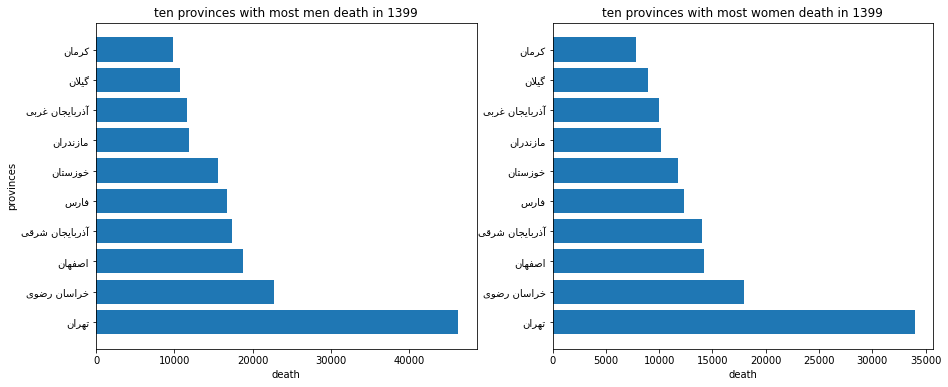

In [28]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

plt.figure(figsize=(15,6))
deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('''
      select province_name, sum(death_num) as death_sum
      from deaths
      inner join provinces on provinces.province_id = deaths.province_id
      inner join sex_type on sex_type.sex_type_id = deaths.sex_type_id
      where year = 1399 and sex_type_name = 'مرد'
      group by provinces.province_id
      order by death_sum DESC
      limit 10
    ''')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0]] = i[1]

labels = [get_display(reshape(label)) for label in list(deats_stat.keys())]

plt.subplot(1,2,1)
plt.barh(labels, list(deats_stat.values()))
plt.title('ten provinces with most men death in 1399')
plt.xlabel('death')
plt.ylabel('provinces')
print(deats_stat)

deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('''
      select province_name, sum(death_num) as death_sum
      from deaths
      inner join provinces on provinces.province_id = deaths.province_id
      inner join sex_type on sex_type.sex_type_id = deaths.sex_type_id
      where year = 1399 and sex_type_name = 'زن'
      group by provinces.province_id
      order by death_sum DESC
      limit 10
    ''')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0]] = i[1]

labels = [get_display(reshape(label)) for label in list(deats_stat.keys())]

plt.subplot(1,2,2)
plt.barh(labels, list(deats_stat.values()))
plt.title('ten provinces with most women death in 1399')
plt.xlabel('death')
deats_stat

# ten provinces with most death in 1395 at zero age

{'آذربایجان شرقی': 649,
 'اصفهان': 511,
 'تهران': 1063,
 'خراسان رضوی': 1265,
 'خوزستان': 821,
 'سیستان وبلوچستان': 743,
 'فارس': 584,
 'كرمان': 463,
 'همدان': 470,
 'کرمانشاه': 355}

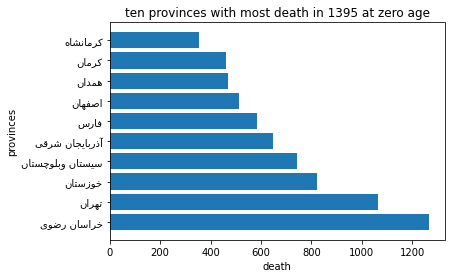

In [29]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('''
      select province_name, sum(death_num) as death_sum
      from deaths
      inner join provinces on provinces.province_id = deaths.province_id
      inner join age_group on age_group.age_group_id = deaths.age_group_id
      where year = 1395 and age_group_name = '0'
      group by provinces.province_id
      order by death_sum DESC
      limit 10
    ''')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0]] = i[1]

labels = [get_display(reshape(label)) for label in list(deats_stat.keys())]
plt.barh(labels, list(deats_stat.values()))
plt.title('ten provinces with most death in 1395 at zero age')
plt.xlabel('death')
plt.ylabel('provinces')
deats_stat

# death rate of different provinces at different years

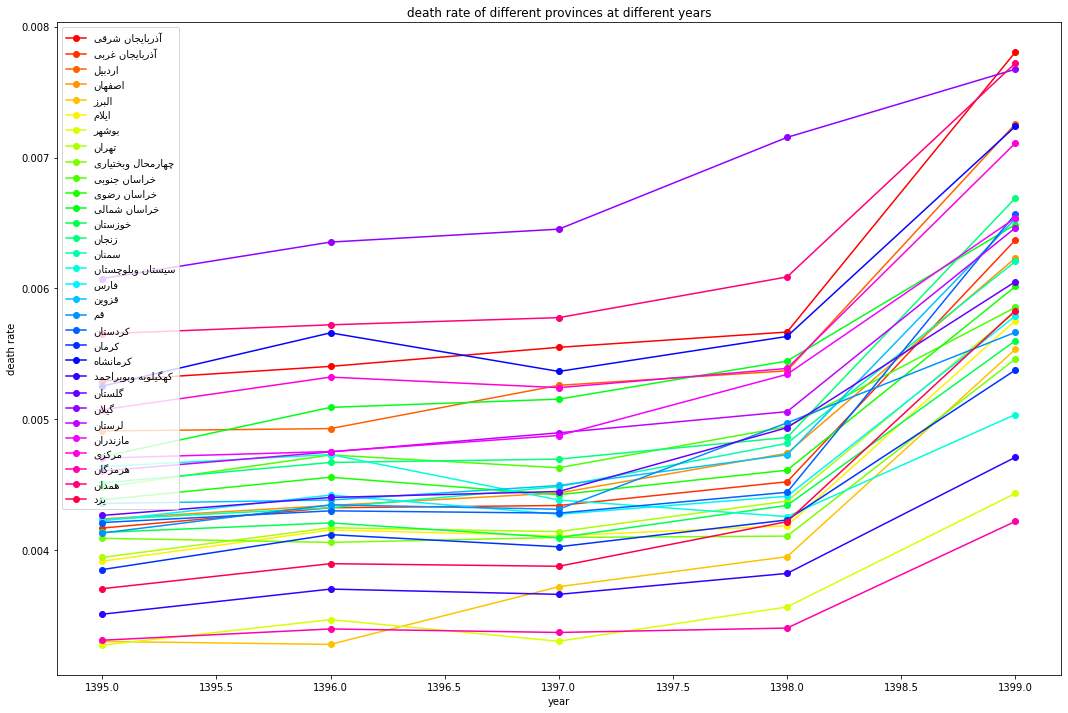

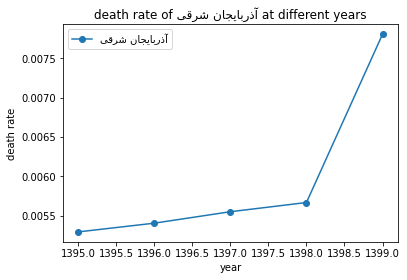

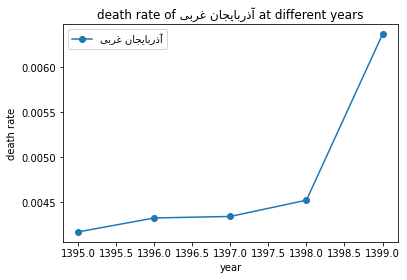

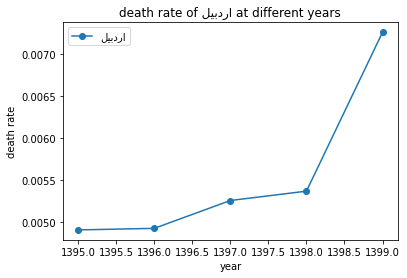

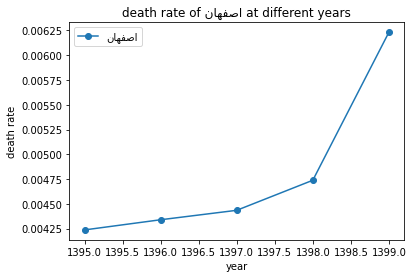

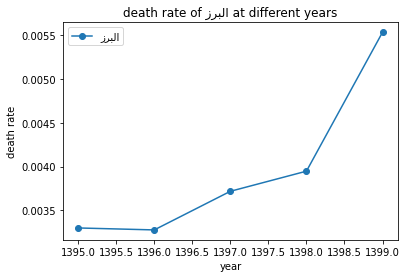

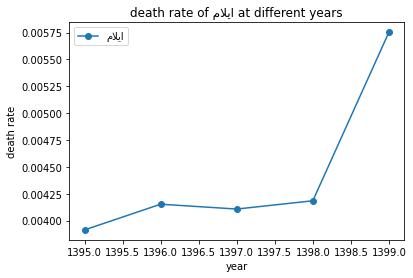

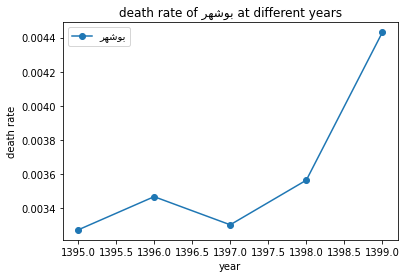

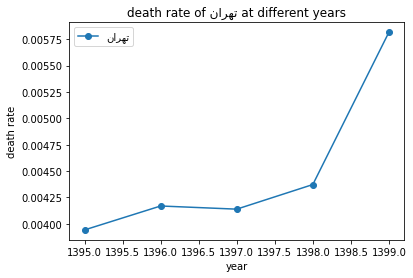

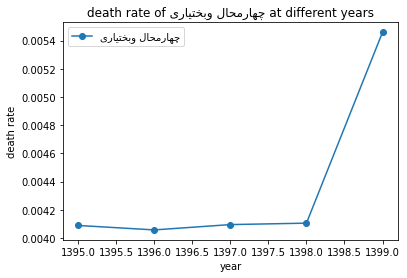

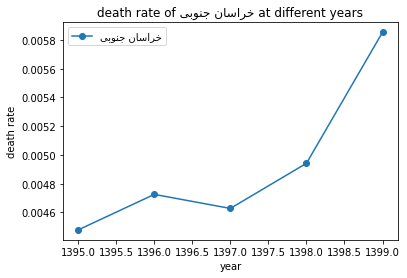

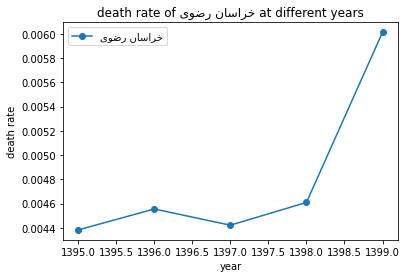

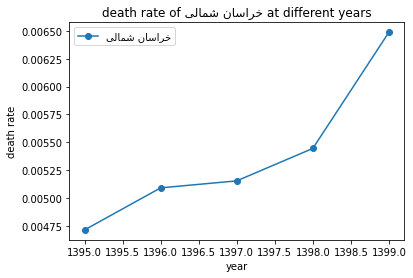

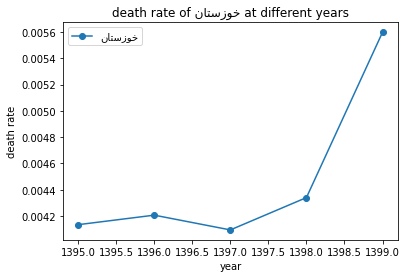

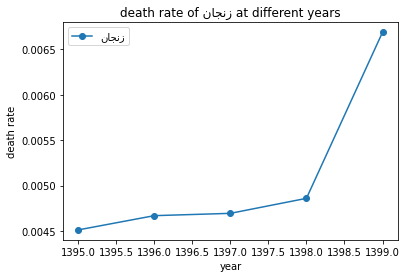

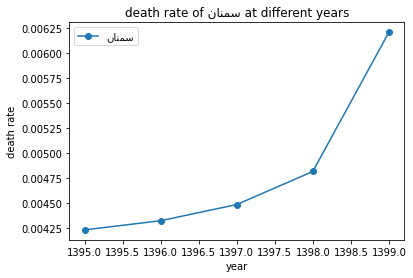

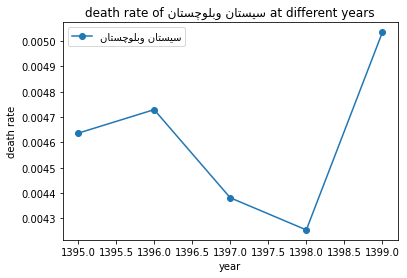

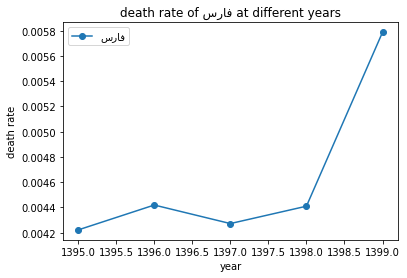

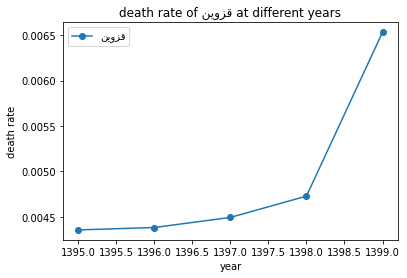

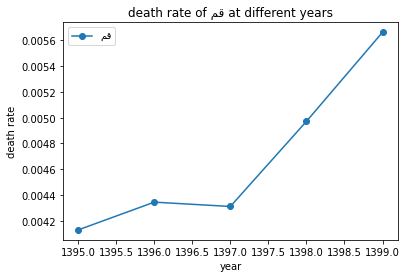

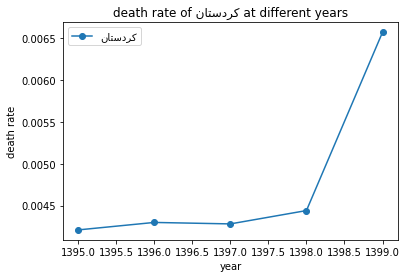

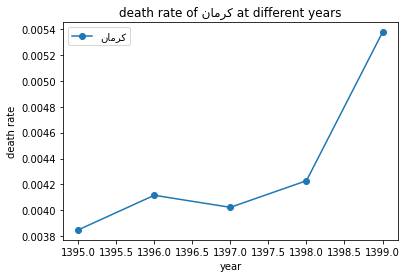

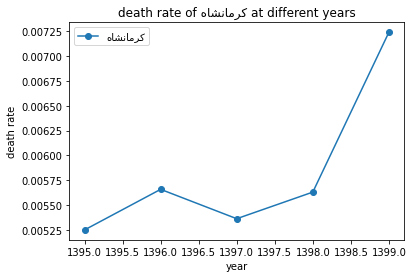

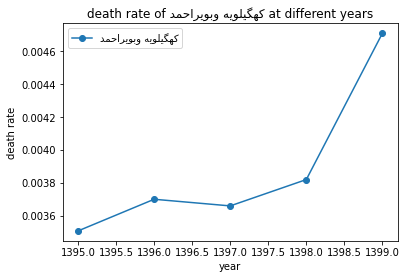

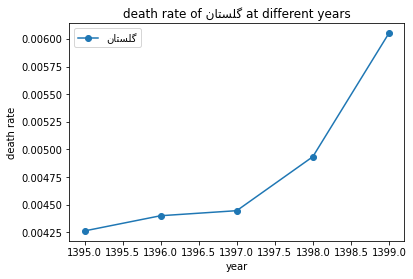

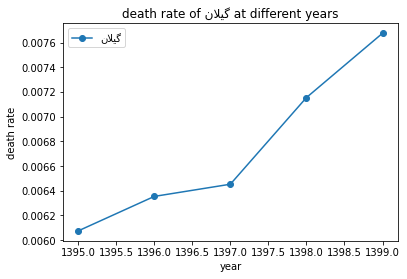

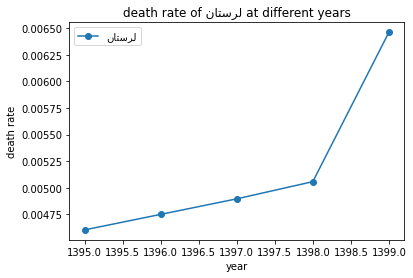

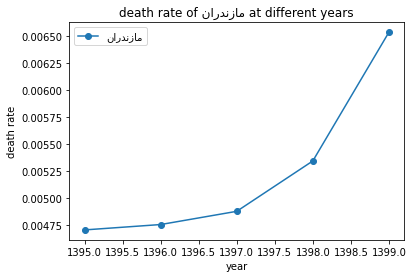

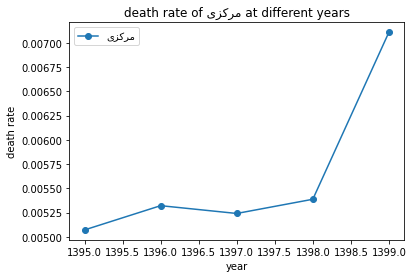

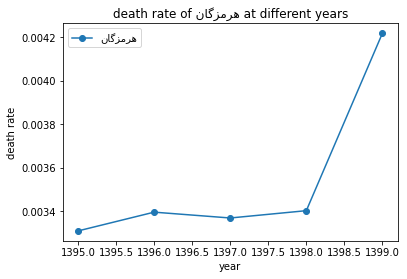

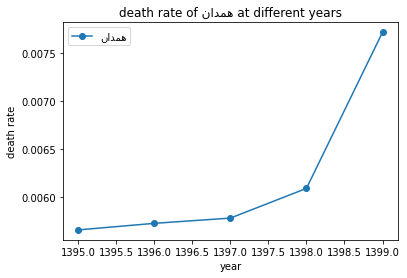

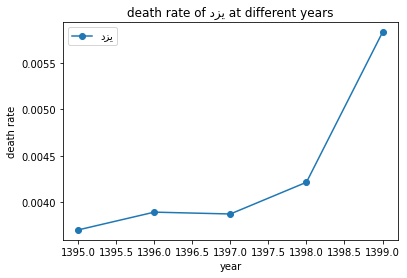

In [35]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(32)

deats_stat = {}
with connect() as con:
  with con.cursor() as cur:
    cur.execute('''
    select year_province_death_sum.year, provinces.province_name,
      cast(year_province_death_sum.death_sum as double precision)/provinces.province_pop
    from (
      select year, province_id, sum(death_num) as death_sum
      from deaths
      group by (year, province_id)
    ) as year_province_death_sum
    inner join provinces on provinces.province_id = year_province_death_sum.province_id
    ''')
    res = (cur.fetchall())
    for i in res:
      deats_stat[i[0], i[1]] = i[2]

labels = [1395, 1396, 1397, 1398, 1399]
per_province = {}
for i in deats_stat.keys():
  if not(i[1] in per_province.keys()):
    per_province[i[1]] = [deats_stat[i]]
  else:
    per_province[i[1]].append(deats_stat[i])

plt.figure(figsize=(18,12))
for j,i in enumerate(per_province.keys()):
  plt.plot(labels, per_province[i], marker='o', color=cmap(j), label=get_display(reshape(i)))
plt.title('death rate of different provinces at different years')
plt.xlabel('year')
plt.ylabel('death rate')
plt.legend()
plt.show()

for i in per_province.keys():
  plt.plot(labels, per_province[i], marker='o', label=get_display(reshape(i)))
  plt.title('death rate of {} at different years'.format(get_display(reshape(i))))
  plt.xlabel('year')
  plt.ylabel('death rate')
  plt.legend()
  plt.show()



#plots analysis

- As can be seen in the mortality plot during different years, the number of deaths per year has been increasing. Between 1398 and 1399, the trend of increasing death has changed. The increase of death number between the two years is much higher than it was years ago. This means that there has been a greater than normal increase in the number of annual deaths since 1998. The reason for this was the arrival of Covid 19 in the country and the impact of this disease on death.

- As can be seen in the mortality plot for different categories of men and women during different years, the number of deaths per year has been increasing. Between 1398 and 1399, the trend of increasing death has changed. The increase of death number between the two years is much higher than it was years ago. The important point here is that the number of deaths for men has been higher over the years than for women. Between 1398 and 1399, the difference between the increase in the number of deaths of men and women was greater than in previous years. This means that between these two years, the number of deaths of men has increased more than women. This could be due to Covid 19 disease and the greater presence of men in society and the greater contact of men with other people during these years.

- In the plot of the highest number of deaths at the age of zero, we see the names of the 10 provinces with the highest number of deaths. Death at birth is a measure of medical error and the low level of medicine in the province. In the top provinces in this respect we see provinces such as Sistan and Baluchestan. The presence of this province is due to the poverty in this province and the low level of medicine in the province. Khuzestan has almost the same situation as Sistan. The interesting point in this plot is the presence of Tehran in the top provinces. Tehran has had similar conditions to Sistan. This is while in the country the concentration of capital is more in Tehran. Most of the country's facilities are in Tehran. The reason for this is the existence of marginalization in the city of Tehran and other deprived areas of this province. It has been the worst performance for Khorasan Razavi. The reason is the existence of deprived areas in this province as well as marginalization. One of the reasons for Khuzestan's poor performance is marginalization. Other provinces had fewer deaths than these. In these provinces, the number of deaths was about half of the deaths in the studied provinces and was lower.

- In the plot of the provinces with the highest number of deaths for women and men, the names of the 10 provinces with the highest number of deaths for women and men are the same. In these provinces, we see that the number of deaths of men was more than women. The plot is related to the year 1399. The reason for this could be the presence of Covid 19 and the greater presence of men and their greater contact with the people in society. Over the years, we have seen that men have always had more deaths than women. Another reason for this could be more men than women. The important point here is the presence of Tehran with the most deaths. Next is Khorasan Razavi, where the number of deaths in both sexes is almost half that of Tehran. The reason for this may be the high population in Tehran compared to other provinces due to the concentration of facilities. Another reason could be Covid 19 and the lack of compliance with most protocols in this province. Another reason could be the worse situation in the suburbs of Tehran and the conditions of anxiety and hard life in this province.

- In 2016, we examined death at birth. In the relevant plot, it can be seen that the first few provinces are the same as in 1399 in terms of poor performance. There is a difference in the number of deaths in the provinces. In 2016, Tehran's performance was worse than Sistan's. However, this was not a factor in Covid 19 disease. Covid 19 can be one of the leading causes of death at birth. In 2016, Khuzestan, like Tehran, performed worse than Sistan and had slightly better performance than Tehran. The worst performance is still for Khorasan. The presence of these non-Sistan provinces in bad practices in these two years makes the reason for marginalization more important. Another reason for this could be water stress, which affects the economy. For example, the deterioration of Sistan's performance could be the reason. All this comparison is true given that the number of births in these years is equal. Maybe in 1399 the birth rate has increased and the death rate after birth has remained constant. Of course, the important point is that the birth rate has been generally declining over the years.

- In the plot "death rate of different provinces at different years" we see the trend of death rate changes. As can be seen, most provinces have had a general trend of increasing death rates in recent years. All provinces have had an increase in death rates from 1398 to 1399. Some have grown more than other provinces. The slope of the line between 1398 and 1399 has been positive for all provinces. Some provinces had a steeper line. This means that their death rate has increased more. Some provinces, such as Sistan, had reduced death rates before 1399. But after 1398 to 1399, the death rate in the province has increased much and the change in this rate has been positive. This can indicate that before Covid 19 and the events of the end of 1398 and 1399, activities have been done to reduce the death rate in this province, which has also had results. But after the end of 1398, the death rate has increased sharply. The work done has not been able to prevent the effects of Covid 19 disease and new changes. The decrease in death rates before 1398 and 1399 in Sistan can be due to migration from this province to other places and population decline. In all provinces, the highest slope of death rate increase was related between 1398 to 1399. This indicates the effect of a disease such as Covid 19. Another significant province is Gilan. The slope of death rate increase between 1397 and 1398 in this province is almost equal to the slope between 1398 and 1399. This could indicate an important and unique factor in this province to increase the death rate.

# multiple consecutive connection problem

- As you know, creating a PostgreSQL database connection is expensive, i.e., it is a resource-heavy and time-consuming process. System resources are limited. When we make several consecutive connections without closing. We use almost all system resources in a short time. This disrupts system performance and slows down the system due to lack of resources. Another problem is that it takes time to connect. If we make a several consecutive connections to do queries, we need a lot of time and the execution time of the program will increase. The program almost stops to make connections to the network. The database has a server to respond to the user. This server accepts a limited number of connections due to limited system resources. To respond to multiple connections at the same time we need multiple threads or in the worst case process. The number of OS threads and processes is limited. If we make several connections, we may use the full capacity of the server. To create other connections we have to stop until the server has new capacity. Using the full capacity of the server also slows down the response. The solution here is to manage possible connections at the same time.

- Due to the cost of creating a new connection, we have to open the connections once and keep them open until the end. In this way, we do not pay for the time and resources of creating a new connection in the program. This fee is paid only at the beginning. This speeds up the Q&A and execution of the program. We also determine the number of simultaneous open connections. This allows us to create a number of connections that do not slow down the response and do not use too many resources at a time. we use connection pool.

- PostgreSQL connection Pool is nothing but cached database connections created and maintained to get reused for coming requests instead of making the new connection every time. There are various advantages of implementing and using a connection pool for your Python application while working with PostgreSQL. The primary benefit is time and performance improvements. Using Connection Pooling, we can reduce the request and response time of database-centric applications in Python.

- connection pool activity in managing connections is showed below.

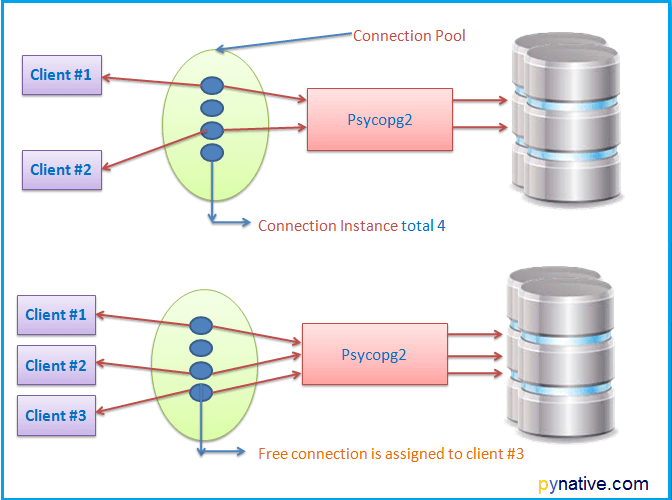
